# Veamos con un ejemplo el uso de concat - merge - join

Contamos con dos estaciones meteorológicas, cada una instalada en una ubicación geográfica diferente, que sensan datos de temperatura, presión y humedad cada una hora.
<BR>
Simulemos algunas mediciones y armemos dos dataframes, uno para cada estación y con datos de un mismo día

In [1]:
import pandas as pd
import numpy as np

# Creamos una serie tipo datetime con 24 valores, mismo día y 24 horas.
horas = pd.date_range("2025-10-11 00:00", periods=24, freq="H")
horas

/tmp/ipython-input-1847358487.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  horas = pd.date_range("2025-10-11 00:00", periods=24, freq="H")


DatetimeIndex(['2025-10-11 00:00:00', '2025-10-11 01:00:00',
               '2025-10-11 02:00:00', '2025-10-11 03:00:00',
               '2025-10-11 04:00:00', '2025-10-11 05:00:00',
               '2025-10-11 06:00:00', '2025-10-11 07:00:00',
               '2025-10-11 08:00:00', '2025-10-11 09:00:00',
               '2025-10-11 10:00:00', '2025-10-11 11:00:00',
               '2025-10-11 12:00:00', '2025-10-11 13:00:00',
               '2025-10-11 14:00:00', '2025-10-11 15:00:00',
               '2025-10-11 16:00:00', '2025-10-11 17:00:00',
               '2025-10-11 18:00:00', '2025-10-11 19:00:00',
               '2025-10-11 20:00:00', '2025-10-11 21:00:00',
               '2025-10-11 22:00:00', '2025-10-11 23:00:00'],
              dtype='datetime64[ns]', freq='h')

In [2]:
# Simulamos el dataframe de la Estacion 1
estacion1 = pd.DataFrame({
    "hora": horas,
    "estacion": "E1",
    "temperatura": np.random.normal(20, 3, 24),  # genera 24 valores (dist normal) con media 20 y desviación 3
    "presion": np.random.normal(1013, 5, 24),  # genera 24 valores (dist normal) con media 1013 y desviación 5
    "humedad": np.random.uniform(40, 80, 24)  # genera 24 valores (dist uniform) con media 40 y desviación 8
})

In [4]:
estacion1.sample(3)

,hora,estacion,temperatura,presion,humedad
9,2025-10-11 09:00:00,E1,22.119274,1015.836138,53.830568
13,2025-10-11 13:00:00,E1,19.032303,1017.738980,51.253005
11,2025-10-11 11:00:00,E1,23.243825,1015.645762,68.238463


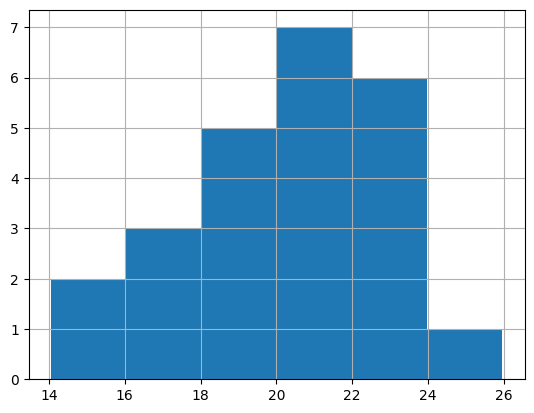

In [5]:
import matplotlib.pyplot as plt
estacion1["temperatura"].hist(bins="auto")
plt.show()

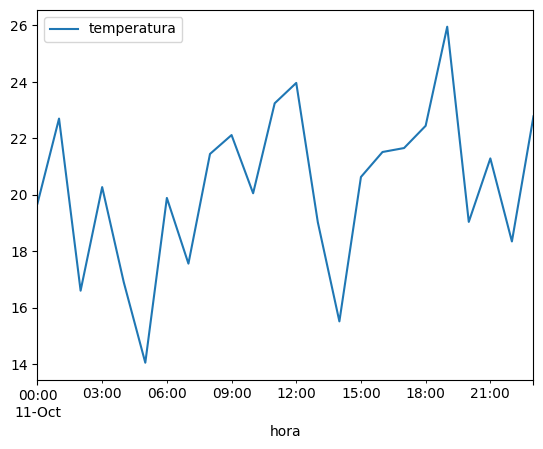

In [6]:
# Graficamos las temperaturas de 1 día
estacion1.plot(x="hora", y="temperatura", kind="line")
plt.show()

In [7]:
# Simulamos el dataframe de la Estacion 1
estacion2 = pd.DataFrame({
    "hora": horas,
    "estacion": "E2",
    "temperatura": np.random.normal(18, 2, 24),
    "presion": np.random.normal(1010, 4, 24),
    "humedad": np.random.uniform(35, 75, 24)
})

In [8]:
estacion2.sample(5)

,hora,estacion,temperatura,presion,humedad
3,2025-10-11 03:00:00,E2,18.432320,1014.618511,48.005715
5,2025-10-11 05:00:00,E2,20.307092,1011.542478,57.382786
8,2025-10-11 08:00:00,E2,19.426497,1013.047650,63.765573
1,2025-10-11 01:00:00,E2,20.258917,1007.185231,48.967443
0,2025-10-11 00:00:00,E2,16.336559,1005.564173,55.880526


## concat - Unificamos dos datasets usando concat

 La forma más natural de unificarlos en pandas es usando:
<BR>
`pd.concat()`
<BR>
Sirve para apilar DataFrames (uno debajo del otro o lado a lado).
Es ideal cuando los DataFrames tienen las mismas columnas (por ejemplo, mismo formato de mediciones de distintas estaciones).
<BR>
Por default, apila los datos verticalmente (uno debajo de otro), por lo que `axis = 0`
<BR>
Para ubicar los dataframes, uno seguido del otro, usamos el argumento `axis = 1`
<BR>
Cada dataframe tiene su index, por lo que es buena práctica al usar concat, regenerar el index en el dataframe resultante, para ello usamos `ignore_index=True`

In [11]:
# Unificamos los datos de ambas estaciones
estaciones= pd.concat([estacion1, estacion2], axis=0, ignore_index=True)

In [14]:
estaciones.sample(3)

,hora,estacion,temperatura,presion,humedad
2,2025-10-11 02:00:00,E1,16.609593,1018.393714,70.003829
25,2025-10-11 01:00:00,E2,20.258917,1007.185231,48.967443
0,2025-10-11 00:00:00,E1,19.694524,1014.531993,64.203059


## merge - une los dataframes por una columna en común
Lo usamos para comparar las mediciones de las estaciones


In [16]:
# Merge por la columna 'hora' (igual que un JOIN ON hora)
merge_estaciones= pd.merge(estacion1, estacion2, on="hora", how="inner")

In [17]:
merge_estaciones.sample(3)

,hora,estacion_x,temperatura_x,presion_x,humedad_x,estacion_y,temperatura_y,presion_y,humedad_y
19,2025-10-11 19:00:00,E1,25.954557,1012.286684,45.761349,E2,18.189774,1006.095561,40.430085
8,2025-10-11 08:00:00,E1,21.450231,1012.423871,59.512041,E2,19.426497,1013.047650,63.765573
4,2025-10-11 04:00:00,E1,16.913572,1013.929156,47.165058,E2,16.234999,1009.789787,39.284202


## join - une los dataframes por el index


In [24]:
# Establecemos 'hora' como índice
estacion1=estacion1.set_index("hora")
estacion2=estacion2.set_index("hora")

In [27]:
# Unimos por índice (hora)
e1_e2_join=estacion1.join(estacion2, lsuffix="_E1", rsuffix="_E2")
e1_e2_join.head()

,estacion_E1,temperatura_E1,presion_E1,humedad_E1,estacion_E2,temperatura_E2,presion_E2,humedad_E2
hora,,,,,,,,
2025-10-11 00:00:00,E1,19.694524,1014.531993,64.203059,E2,16.336559,1005.564173,55.880526
2025-10-11 01:00:00,E1,22.702668,1005.400305,60.898341,E2,20.258917,1007.185231,48.967443
2025-10-11 02:00:00,E1,16.609593,1018.393714,70.003829,E2,20.427986,1011.180782,46.258765
2025-10-11 03:00:00,E1,20.277207,1011.111205,54.467732,E2,18.432320,1014.618511,48.005715
2025-10-11 04:00:00,E1,16.913572,1013.929156,47.165058,E2,16.234999,1009.789787,39.284202


In [26]:
# Unimos solo la columna 'temperatura' de la segunda estación
e1_e2_join_cust=estacion1.join(estacion2["temperatura"], lsuffix="_E2", rsuffix="_E1")
e1_e2_join_cust.head()

,estacion,temperatura_E2,presion,humedad,temperatura_E1
hora,,,,,
2025-10-11 00:00:00,E1,19.694524,1014.531993,64.203059,16.336559
2025-10-11 01:00:00,E1,22.702668,1005.400305,60.898341,20.258917
2025-10-11 02:00:00,E1,16.609593,1018.393714,70.003829,20.427986
2025-10-11 03:00:00,E1,20.277207,1011.111205,54.467732,18.432320
2025-10-11 04:00:00,E1,16.913572,1013.929156,47.165058,16.234999


In [25]:
# Unimos solo las columnas de temperatura de ambas estaciones
e1_e2_join_cust_solotemp=estacion1[["temperatura"]].join(estacion2[["temperatura"]], lsuffix="_E1", rsuffix="_E2")
e1_e2_join_cust_solotemp.head()

,temperatura_E1,temperatura_E2
hora,,
2025-10-11 00:00:00,19.694524,16.336559
2025-10-11 01:00:00,22.702668,20.258917
2025-10-11 02:00:00,16.609593,20.427986
2025-10-11 03:00:00,20.277207,18.432320
2025-10-11 04:00:00,16.913572,16.234999


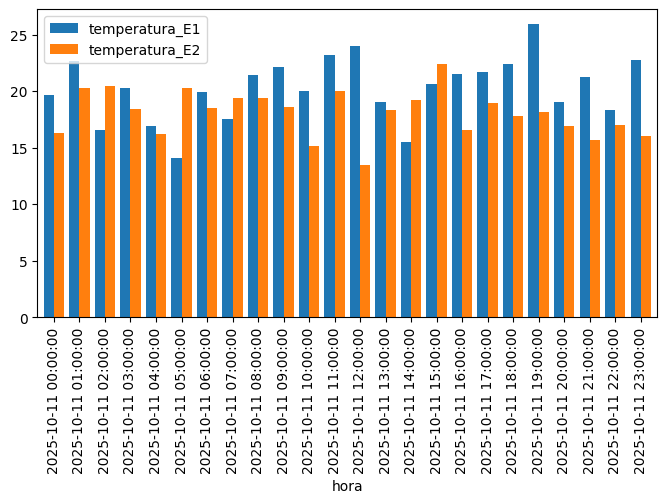

In [34]:
# Vere un gráfico comparativo
import matplotlib.pyplot as plt
e1_e2_join_cust_solotemp.plot(kind="bar", width=0.8, figsize=(8, 4))
plt.show()

Si trabajás con datos horarios o diarios, join() es muy cómodo porque muchas veces ya tenés el tiempo como índice (DatetimeIndex). Te permite hacer operaciones de series temporales como:

# Importamos Dataset Booking - Hotels - Users
https://www.kaggle.com/code/sonawanelalitsunil/international-hotel-booking-analytics-ml-34-75/notebook

In [35]:
# Importar la librería Pandas
import pandas as pd

In [36]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['netflix_titles.csv',
 'hotels.csv',
 'users.csv',
 'reviews.csv',
 'Kaggle_users.xlsx',
 'booking_db.sqlite',
 'satis_clientes.csv']

In [38]:
# Cambiamos el directorio para importar con facilidad
os.chdir("/content/drive/MyDrive/datasets")
os.listdir(".")

['netflix_titles.csv',
 'hotels.csv',
 'users.csv',
 'reviews.csv',
 'Kaggle_users.xlsx',
 'booking_db.sqlite',
 'satis_clientes.csv']

In [39]:
# Importamos Reviews
reviews = pd.read_csv('reviews.csv')

In [40]:
# Importamos Hotels
hotels = pd.read_csv('hotels.csv')

In [41]:
# Importamos Users
users = pd.read_csv('users.csv')

## Actividad 1 (Dificultad *)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, r.score_overall
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
```

In [42]:
# Merge (equivalente al SQL JOIN)
hotels_Reviews=pd.merge(hotels, reviews, on="hotel_id", how="inner")
hotels_Reviews.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,...,user_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,1600,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,8.7,Practice reduce young our because machine. Rec...
1,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,485,2021-01-18,8.7,8.8,8.9,8.4,8.9,8.7,8.4,Summer leader sea. Civil morning operation amo...
2,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,1421,2020-12-04,8.8,8.3,8.6,9.1,9.5,9.1,7.5,Apply need explain movement wait above bar. Tu...
3,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,710,2023-06-17,8.8,9.3,9.4,8.2,9.1,8.3,8.4,Soldier job southern back check. Fall check pu...
4,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,1383,2020-09-06,8.7,8.2,8.8,8.7,9.4,9.0,7.4,Various get next environment. This them positi...


In [44]:
# Seleccionamos solo las columnas que nos solicitan
hotels_Reviews=hotels_Reviews[["hotel_name", "country", "score_overall"]]
hotels_Reviews.head()

,hotel_name,country,score_overall
0,The Azure Tower,United States,8.7
1,The Azure Tower,United States,8.7
2,The Azure Tower,United States,8.8
3,The Azure Tower,United States,8.8
4,The Azure Tower,United States,8.7


## Actividad 2 (Dificultad *)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, avg(r.score_overall) as avg_score
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
GROUP by h.hotel_name, h.country
```

In [45]:
# Merge (equivalente al SQL JOIN)
hotels_Reviews=hotels_Reviews[["hotel_name", "country", "score_overall"]]


In [46]:
# Agrupación / Agregación
result=hotels_Reviews.groupby(["hotel_name", "country"]).agg(
    avg_score=("score_overall", "mean")
)
result.head()

,,avg_score
hotel_name,country,
Aztec Heights,Mexico,8.759381
Berlin Mitte Elite,Germany,9.002324
Canal House Grand,Netherlands,9.090713
Colosseum Gardens,Italy,9.044140
Copacabana Lux,Brazil,8.869113


In [ ]:
#filtrar hoteles de Argentina
result=hotels_Reviews.groupby(["hotel_name", "country"]).agg(
    avg_score=("score_overall", "mean")
)
result.head()

## Actividad 3 (Dificultad ***)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, avg(r.score_overall) as avg_score
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
WHERE h.country like '%argentina%'
GROUP by h.hotel_name, h.country
```



In [ ]:
# Merge (equivalente al SQL JOIN)
hotels_Reviews=hotels_Reviews[["hotel_name", "country", "score_overall"]]

In [47]:
# Filtro (equivalente al WHERE con LIKE)
filtered=hotels_Reviews[hotels_Reviews["country"].str.contains("argentina", case=False)]

filtered.head()

,hotel_name,country,score_overall
43935,Tango Boutique,Argentina,8.9
43936,Tango Boutique,Argentina,8.9
43937,Tango Boutique,Argentina,8.7
43938,Tango Boutique,Argentina,9.0
43939,Tango Boutique,Argentina,8.9


In [48]:
# Agrupación y promedio (equivalente al GROUP BY y AVG)
result=(filtered.groupby(["hotel_name", "country"]).agg(
    avg_score=("score_overall", "mean"))
)
result.head()

,,avg_score
hotel_name,country,
Tango Boutique,Argentina,8.822495


## Bonus Track
Usar OpenStreetMap para encontrar la dirección del Hotel

In [49]:
# https://www.openstreetmap.org/search?lat=-34.6037&lon=-58.3816&zoom=10#map=12/-37.2888/-59.1229

hotels[hotels["hotel_name"]=="Tango Boutique"]

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
22,23,Tango Boutique,Buenos Aires,Argentina,5,-34.6037,-58.3816,8.9,8.8,8.7,9.0,8.8,8.7
